<a href="https://colab.research.google.com/github/drgarimajain/a2/blob/main/23D1629_Assgnment1_DH607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               #Organism/Name   TaxID BioProject Accession  BioProject ID  \
0        Neopyropia yezoensis    2788          PRJNA589917         589917   
1  Emiliania huxleyi CCMP1516  280463           PRJNA77753          77753   
2        Arabidopsis thaliana    3702           PRJNA10719          10719   
3                 Glycine max    3847           PRJNA19861          19861   
4        Solanum lycopersicum    4081             PRJNA119            119   

      Group        SubGroup  Size (Mb)      GC% Assembly Accession  \
0     Other           Other    107.591  64.8454    GCA_009829735.1   
1  Protists  Other Protists    167.676     64.5    GCA_000372725.1   
2    Plants     Land Plants    119.669  36.0529    GCA_000001735.2   
3    Plants     Land Plants    978.942  35.1221    GCA_000004515.5   
4    Plants     Land Plants    827.963  35.6925    GCA_000188115.4   

                                           Replicons     WGS  Scaffolds  \
0  chromosome 1:CM020618.1; chromosome 2:

<ipython-input-2-6984a3ccd737>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eukaryotes_df['log_genes'] = np.log10(eukaryotes_df['Genes'])


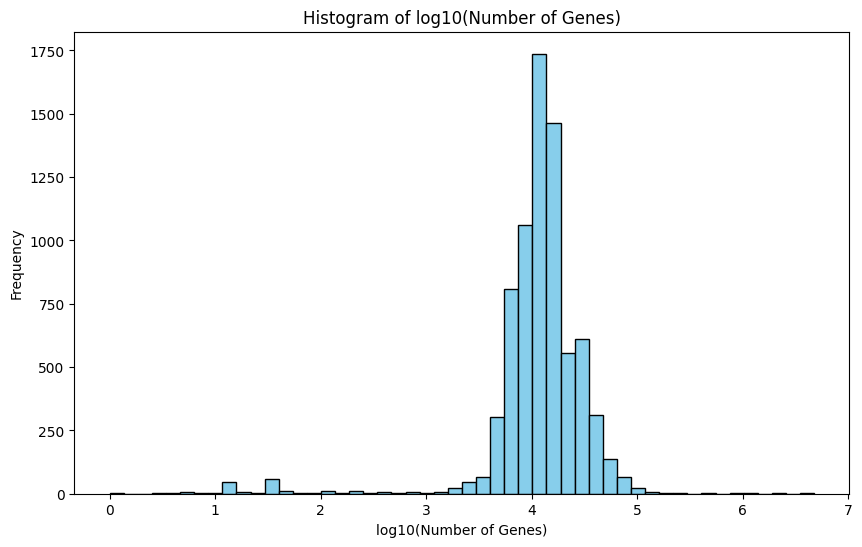

count    7.437000e+03
mean     1.822151e+04
std      8.389568e+04
min      1.000000e+00
25%      9.007000e+03
50%      1.242000e+04
75%      1.772200e+04
max      4.736081e+06
Name: Genes, dtype: float64


In [2]:
# Question 10(a) Load the dataset and analyze the column representing the number of genes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = 'https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt'
eukaryotes_df = pd.read_csv(url, sep='\t', low_memory=False)


print(eukaryotes_df.head())

# Converting the 'Genes' column to numeric
eukaryotes_df['Genes'] = pd.to_numeric(eukaryotes_df['Genes'], errors='coerce')

# Dropping rows with NaN values
eukaryotes_df = eukaryotes_df.dropna(subset=['Genes'])

# log10 of the 'Genes' column
eukaryotes_df['log_genes'] = np.log10(eukaryotes_df['Genes'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(eukaryotes_df['log_genes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of log10(Number of Genes)')
plt.xlabel('log10(Number of Genes)')
plt.ylabel('Frequency')
plt.show()

print(eukaryotes_df['Genes'].describe())


In [3]:
# Question 10 b)Determine the 99.5% quantile of the number of genes
quantile_995 = eukaryotes_df['Genes'].quantile(0.995)
print(f"The 99.5% quantile of the number of genes is: {quantile_995}")

The 99.5% quantile of the number of genes is: 89932.61999999997


In [4]:
# Question 10 (c) Filter out the dataset to only retain entries with the number of genes below the 99.5% quantile

filtered_df = eukaryotes_df[eukaryotes_df['Genes'] < quantile_995]
print(f"Number of entries after filtering: {filtered_df.shape[0]}")

Number of entries after filtering: 7399


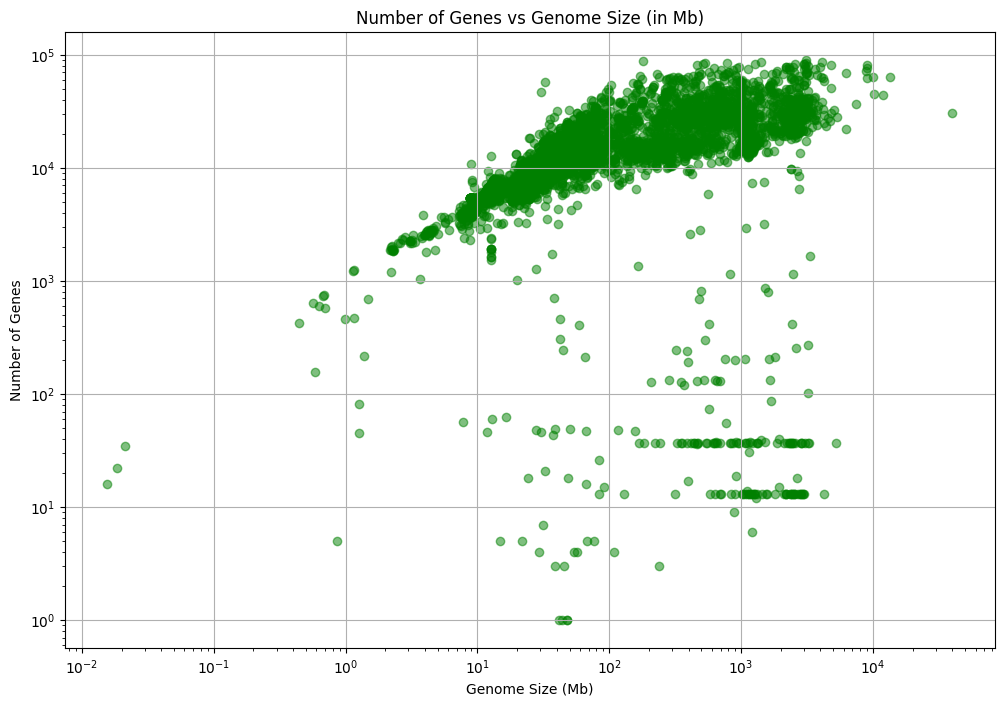

In [9]:
# Question 10(d) How does the number of genes vary by genome size?

plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['Size (Mb)'], filtered_df['Genes'], alpha=0.5, color='green')
plt.title('Number of Genes vs Genome Size (in Mb)')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Number of Genes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [11]:

correlation = filtered_df['Size (Mb)'].corr(filtered_df['Genes'])
print(f"Correlation between genome size and number of genes: {correlation}")


Correlation between genome size and number of genes: 0.43531158149774213


<ipython-input-13-306f91f51f23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Genome Size Bins'] = bins


<Figure size 1000x600 with 0 Axes>

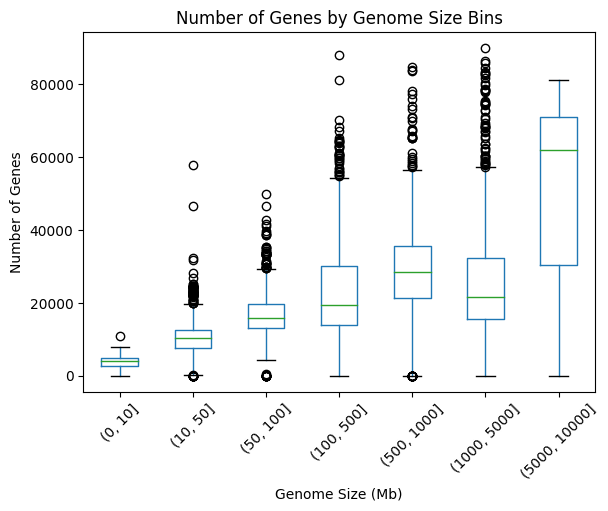

In [13]:
# Creating bins for genome size
bins = pd.cut(filtered_df['Size (Mb)'], bins=[0, 10, 50, 100, 500, 1000, 5000, 10000])
filtered_df['Genome Size Bins'] = bins

# Plotting  box plot
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Genes', by='Genome Size Bins', grid=False)
plt.title('Number of Genes by Genome Size Bins')
plt.suptitle('')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Number of Genes')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


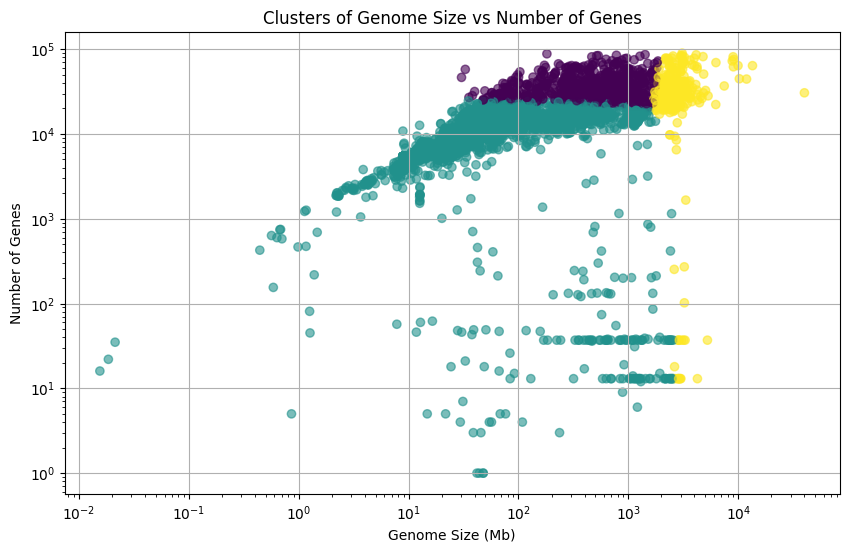

In [10]:
# Question 10 (e) What are the distinct clusters in the eukaryote data?

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


clustering_data = filtered_df[['Size (Mb)', 'Genes']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot t
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['Size (Mb)'], clustering_data['Genes'], c=clustering_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Genome Size vs Number of Genes')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Number of Genes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()